<a href="https://colab.research.google.com/github/AyushKumar2008/DogeCoin-Price-Prediction-ML-/blob/main/DOGE_COIN_Price_Prediction_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dogecoin Price Prediction model




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv("DOGE-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


checking the correlation

In [ ]:
data.corr(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993735,0.993601,0.992368,0.992368,0.550024
High,0.993735,1.000000,0.986198,0.995007,0.995007,0.616042
Low,0.993601,0.986198,1.000000,0.994460,0.994460,0.514220
Close,0.992368,0.995007,0.994460,1.000000,1.000000,0.583845
Adj Close,0.992368,0.995007,0.994460,1.000000,1.000000,0.583845
Volume,0.550024,0.616042,0.514220,0.583845,0.583845,1.000000


Converting the string date & time in proper date & time format with the help of pandas.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'],infer_datetime_format=True)
data.set_index('Date', inplace=True)
data.isnull().any()

<ipython-input-4-9bb51c1527ed>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'],infer_datetime_format=True)


,0
Open,True
High,True
Low,True
Close,True
Adj Close,True
Volume,True


check for the presence of null values in the dataset.

In [ ]:
data.isnull().sum()

Dropping those missing values

In [ ]:
data = data.dropna()

check the statistical analysis of the data using describe() method.

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000,2.334000e+03
mean,0.064848,0.068202,0.061686,0.064949,0.064949,9.501921e+08
std,0.089241,0.096103,0.082657,0.089340,0.089340,3.149228e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002711,0.002801,0.002636,0.002715,0.002715,4.109104e+07
50%,0.011040,0.013263,0.009794,0.011576,0.011576,1.893488e+08
75%,0.083385,0.085707,0.080783,0.083509,0.083509,6.661201e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


firstly we will analyze the closing price as we need it to perform the prediction.

Text(0.5, 1.0, 'Date vs Close of 2021')

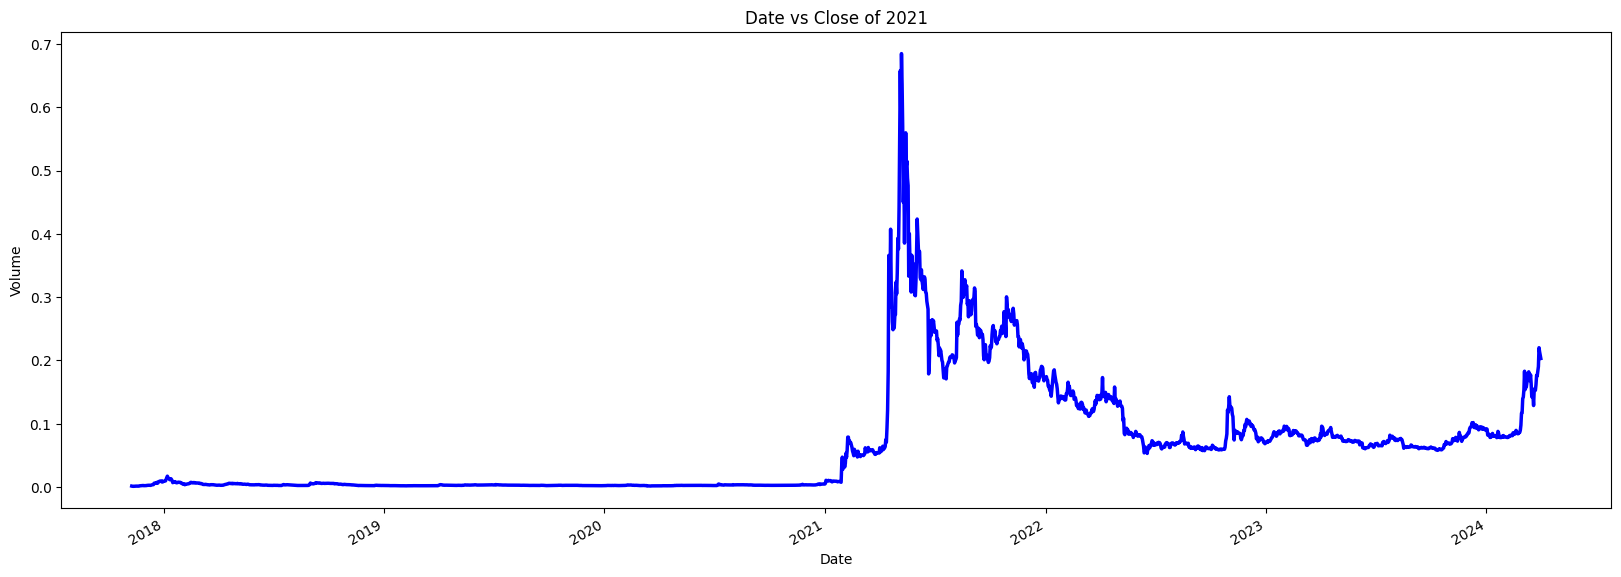

In [ ]:
plt.figure(figsize=(20, 7))
x = data.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

The column ‘Close’ is our predicted feature. We are taking different factors from the predefined factors for our own calculation and naming them suitably. Also, we are checking each factor while correlating with the ‘Close’ column while sorting it in descending order.

In [ ]:
data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
data["y"] = data["High"] / data["Volume"]
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))

,Close
Close,1.000000
Adj Close,1.000000
High,0.995007
Low,0.994460
Open,0.992368
Volume,0.583845
b,0.452819
gap,0.374743
a,0.166404
z,0.063355


By, observing the correlating factors, we can choose a few of them. We are excluding High, Low, and Open as they are highly correlated from the beginning.

In [ ]:
data = data[["Close", "Volume", "gap", "a", "b"]]
data.head()

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


In [ ]:
df2 = data.tail(30)
train = df2[:11]
test = df2[-19:]

print(train.shape, test.shape)


(11, 5) (19, 5)


The shape of the train is (11, 5), and the test is (19, 5). Let’s implement the SARIMAX model and see the results.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
    "Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  34.754
Date:                Fri, 25 Apr 2025   AIC                            -53.509
Time:                        20:01:40   BIC                            -51.088
Sample:                    03-01-2024   HQIC                           -56.164
                         - 03-11-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      1.697e-10   8.13e-11      2.088      0.037    1.04e-11    3.29e-10
gap         1.375e-09   8.23e-10      1.671      0.095   -2.38e-10    2.99e-09
a              0.0958   2.13e-18   4.49e+16      0.0

observe the prediction in time series.

In [ ]:
start = 11
end = 29
predictions = results.predict(start=start,end=end,exog=test.drop("Close", axis=1))
predictions

,predicted_mean
2024-03-12,0.185781
2024-03-13,0.170051
2024-03-14,0.194038
2024-03-15,0.187426
2024-03-16,0.181751
2024-03-17,0.176801
2024-03-18,0.174874
2024-03-19,0.166192
2024-03-20,0.168936
2024-03-21,0.168627


Finally, plot the prediction to get a visualization.

<Axes: xlabel='Date'>

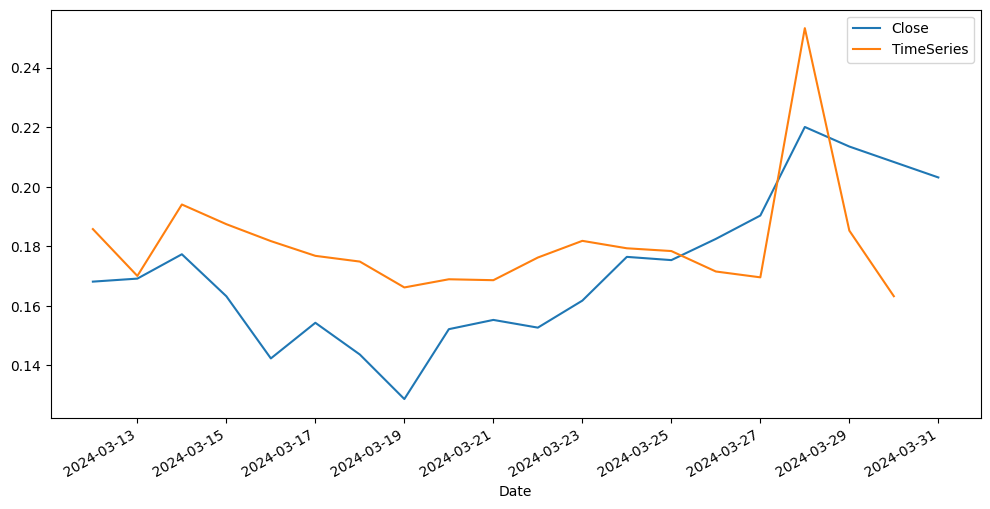

In [ ]:
test["Close"].plot(legend=True, figsize=(12, 6))
predictions.plot(label='TimeSeries', legend=True)